In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import random
import seaborn as sns
from scipy import stats

In [42]:
#1 A bank found that the average number of cars waiting during the 
# noon hour at a drive-up window follows a Poisson distribution 
# with a mean of 2 cars. Make a chart of this distribution and 
# answer these questions concerning the probability of cars 
# waiting at the drive-up window.


# What is the probability that no cars drive up in the noon hour?
mean = 2
target = 0
p_0_exp = stats.poisson(mean).pmf(target)
p_0_exp

0.1353352832366127

In [43]:
# simulation
nrows = 100_000
ncols = 1

rolls = np.random.poisson(mean, nrows * ncols).reshape(nrows,ncols)
df = pd.DataFrame(rolls)
df.head()

,0
0,3
1,2
2,2
3,2
4,3


In [45]:
df['zero_cars'] = df[0] == target
df

,0,zero_cars
0,3,False
1,2,False
2,2,False
3,2,False
4,3,False
...,...,...
99995,2,False
99996,2,False
99997,2,False
99998,1,False


In [46]:
df['zero_cars'].mean()

0.13363

In [47]:
# What is the probability that 3 or more cars come through the drive through?
mean = 2
target = 3

p_3ormore_exp = stats.poisson(mean).sf(target - 1)
p_3ormore_exp

0.32332358381693654

In [48]:
# simulation
nrows = 100_000
ncols = 1

rolls = np.random.poisson(mean, nrows * ncols).reshape(nrows,ncols)
df = pd.DataFrame(rolls)

df['zero_cars'] = df[0] >= target
df.head()

,0,zero_cars
0,4,True
1,3,True
2,0,False
3,4,True
4,4,True


In [49]:
df['zero_cars'].mean()

0.32497

In [50]:
# How likely is it that the drive through gets at least 1 car?
mean = 2
target = 1
p_atleast_1_exp = stats.poisson(mean).sf(target - 1)
p_atleast_1_exp

0.8646647167633873

In [51]:
nrows = 100_000
ncols = 1

rolls = np.random.poisson(mean, nrows * ncols).reshape(nrows,ncols)


Text(0.5, 0, 'Avg Number of Cars Waiting During the Noon Hour')

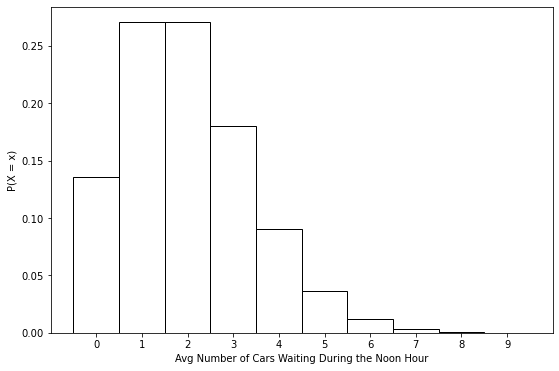

In [5]:
x = range(10)
y = stats.poisson(2).pmf(x)

plt.figure(figsize=(9, 6))
plt.bar(x, y, edgecolor='black', color='white', width=1)
plt.xticks(x)
plt.ylabel('P(X = x)')
plt.xlabel('Avg Number of Cars Waiting During the Noon Hour')

In [6]:
x = random.poisson(lam=2, size=1000000)
noon = pd.DataFrame(x)
noon['car_0'] = noon[0] == 0
noon['car_1'] = noon[0] == 1
noon['car_2'] = noon[0] == 2
noon['car_3'] = noon[0] == 3
noon['car_4'] = noon[0] == 4
noon['car_3ormore'] = noon[0] >= 3
noon['at_least1'] = noon[0] > 0
noon

,0,car_0,car_1,car_2,car_3,car_4,car_3ormore,at_least1
0,3,False,False,False,True,False,True,True
1,2,False,False,True,False,False,False,True
2,3,False,False,False,True,False,True,True
3,2,False,False,True,False,False,False,True
4,2,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...
999995,1,False,True,False,False,False,False,True
999996,3,False,False,False,True,False,True,True
999997,1,False,True,False,False,False,False,True
999998,2,False,False,True,False,False,False,True


In [7]:
#Answering Theoretically
p_no_cars = noon.car_0.mean()
p_3ormore = noon.car_3ormore.mean()
p_at_least1 = 1 - noon.car_0.mean()

data = [[p_no_cars, p_3ormore, p_at_least1], [p_0_exp, p_3ormore_exp, p_atleast_1_exp]]
rows = ['Expected', 'Observed']
cols = ['No Cars', '3 or More Cars', 'At Least 1 Car']
results = pd.DataFrame(data, rows, cols)
results

,No Cars,3 or More Cars,At Least 1 Car
Expected,0.135203,0.322881,0.864797
Observed,0.135335,0.323324,0.864665


In [8]:
# sns.distplot(random.poisson(lam=lamda, size=n), kde=False)

In [9]:
# to plot a normal distribution : 
# μ = 3
# σ = 0.3
# x = np.linspace(μ - 3*σ, μ + 3*σ, 100)
# plt.plot(x, stats.norm.pdf(x, μ, σ))

In [10]:
#2 Grades of State University graduates are normally distributed with 
# a mean of 3.0 and a standard deviation of .3. 
# Calculate the following:

# What grade point average is required to be in the 
# top 5% of the graduating class?

μ = 3.0
σ = .3

grades = stats.norm(μ,σ)



top_5_percent = grades.ppf(.95)
top_5_percent

# or stats.norm(mean,sd).isf(.05)

3.4934560880854417

/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


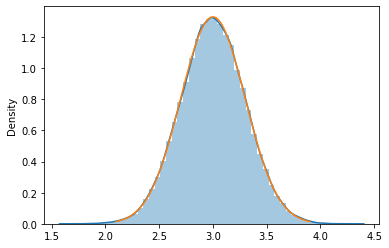

In [11]:
# Simulation
trials = n = 100_000
sim = random.normal(μ,σ,n)
sim = pd.DataFrame(sim)

fig = plt.figure()

obs = sns.distplot(sim)

# Plot the Expected Distribution based on known parameters.
# Expected
x = np.linspace(μ - 3*σ, μ + 3*σ, 100)
y = stats.norm.pdf(x, μ, σ)
exp = sns.lineplot(x, y)
exp.tick_params(axis='x')
exp.tick_params(axis='y')

In [12]:
# What GPA constitutes the bottom 15% of the class?

bottom_fifteen = grades.ppf(.15)
bottom_fifteen

2.689069983151863

In [13]:
# An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. 
# Determine the range of the third decile. 
# Would a student with a 2.8 grade point average qualify for this scholarship?

high_range = grades.isf(.7)
high_range

2.842679846187588

In [14]:
low_range = grades.isf(.8)
low_range

2.7475136299281258

In [15]:
# Yes, 2.8 would qualify

In [16]:
# If I have a GPA of 3.5, what percentile am I in?
grades.cdf(3.5)

0.9522096477271853

In [17]:
#3 A marketing website has an average click-through rate of 2%. One day they observe 4326 
# visitors and 97 click-throughs. How likely is it that this many people or more click through?

trials = 100_000
rate = .02
visitors = 4326
observed = 97
expected_clicks = rate * visitors
expected_clicks

86.52

In [18]:
# Simulation
sim = pd.DataFrame(np.random.poisson(expected_clicks, trials)).rename(columns={0: 'click_throughs'})
sim

,click_throughs
0,68
1,77
2,79
3,96
4,89
...,...
99995,84
99996,100
99997,86
99998,86


In [19]:
# How likely is it that 97 people or more click through?
exp = stats.poisson(expected_clicks)

exp.sf(96)

0.14211867659283192

In [20]:
#4 You are working on some statistics homework consisting of 100 questions where all of the answers 
# are a probability rounded to the hundreths place. 
# Looking to save time, you put down random probabilities as the answer to each question.
# What is the probability that at least one of your first 60 answers is correct?

homework = stats.binom(60,1/100).sf(0)
homework

0.4528433576092388

In [21]:
# Theoretical
p_right = 1/100
p_wrong = 1 - p_right

# Chance you are wrong 60 times in a row:
p_wrong_60inarow = p_wrong**60

p_right_in_first60_exp = 1 - p_wrong_60inarow
p_right_in_first60_exp

0.4528433576092388

In [22]:
#5 The codeup staff tends to get upset when the student break area is not cleaned up. 
# Suppose that there's a 3% chance that any one student cleans the break area when they visit it, 
# and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. 
# How likely is it that the break area gets cleaned up each day? 

chance = .03
students = 66*.9
avg_clean_perday = students * chance

stats.poisson(avg_clean_perday).sf(0)

0.8316987919743856

In [23]:
# How likely is it that it goes two days without getting cleaned up?

p_not_cleaned_daily = stats.poisson(avg_clean_perday).cdf(0)
p_not_cleaned_2days = p_not_cleaned_daily**2
p_not_cleaned_2days

0.028325296622881146

In [24]:
# All week?
p_not_cleaned_weekdays = p_not_cleaned_daily**5
p_not_cleaned_weekdays

0.0001350318339887432

In [25]:
#6 You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. 
# After several weeks of careful observation, you notice that the average number of people in line when 
# your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. 
# If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, 
# what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? 
# Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

μ = 15
ø = 3

wait = stats.norm((μ*2)+10,(ø*2))
wait.cdf(45)

0.7976716190363569

In [26]:
#7 Connect to the employees database and find the average salary of current employees, along with the standard deviation. 
# For the following questions, calculate the answer based on modeling the employees salaries with a 
# normal distribution defined by the calculated mean and standard 
# deviation then compare this answer to the actual values present in the salaries dataset.

from env import host, user, password
url = f'mysql+pymysql://{user}:{password}@{host}/employees'

In [27]:
pd.read_sql('SELECT * FROM employees LIMIT 5 OFFSET 50', url)

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10051,1953-07-28,Hidefumi,Caine,M,1992-10-15
1,10052,1961-02-26,Heping,Nitsch,M,1988-05-21
2,10053,1954-09-13,Sanjiv,Zschoche,F,1986-02-04
3,10054,1957-04-04,Mayumi,Schueller,M,1995-03-13
4,10055,1956-06-06,Georgy,Dredge,M,1992-04-27


In [28]:
emp_sql = '''
SELECT *
FROM employees
'''
employees = pd.read_sql(emp_sql, url)
employees.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [29]:
salaries_sql = '''
SELECT *
FROM salaries
WHERE to_date > now()'''
salaries = pd.read_sql(salaries_sql,url)
salaries.head()

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01
3,10004,74057,2001-11-27,9999-01-01
4,10005,94692,2001-09-09,9999-01-01


In [30]:
μ = salaries.salary.mean()
μ

72012.23585730705

In [31]:
σ = salaries.salary.std()
σ

salaries_exp = stats.norm(μ,σ)

In [32]:
# observed salaries
obs = salaries_obs = pd.read_sql(salaries_sql, url)

In [33]:
# A. What percent of employees earn less than 60,000?
p_lessthan_60k = salaries_exp.cdf(60_000)
p_lessthan_60k

0.24385742480214423

In [34]:
# observed
obs['less_than_60k'] = obs.salary < 60_000
obs.less_than_60k.mean()

0.2705727041028802

In [35]:
# What percent of employees earn more than 95,000?
p_morethan_95k = salaries_exp.sf(95_000)
p_morethan_95k

0.09208819199804053

In [36]:
# observed
obs['more_than_95k'] = obs.salary > 95_000
obs.more_than_95k.mean()

0.1086272092752078

In [37]:
# What percent of employees earn between 65k and 80k?

# low_end
p_more_than_65k = salaries_exp.sf(65_000)

# high_end
p_less_than_80k = salaries_exp.cdf(80_000)

# union
p_more_than_65_and_less_than_80 = p_more_than_65k * p_less_than_80k
p_more_than_65_and_less_than_80

0.44549196191109997

In [38]:
# Observed
obs['morethan65k'] = obs.salary > 65_000
obs['lessthan95k'] = obs.salary < 95_000
obs['between_65_95'] = obs.morethan65k & obs.lessthan95k
obs.between_65_95.mean()

0.5071129916209958

In [39]:
# What do the top 5% make?

top_5_salary_exp = salaries_exp.ppf(0.95)
top_5_salary_exp

100484.64454102775